# **Upper Confidence Bound**

Name: Seanrei Ethan M. Valdeabella

Date: February 3, 2024

In [7]:
#@title Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#@title Importing the Dataset

dataset_name = "Ads_CTR_Optimisation.csv" #@param {type:"string"}
dataset = pd.read_csv(dataset_name)

In [9]:
#@title Implementing UCB
import math


N = 10_000  # Total number of rounds ('users' in the context of the dataset used)
d = 10  # Number of ads
ads_selected = []  # Keeps track of which ads were chosen
numbers_of_selections = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Number of times an ad was chosen
sums_of_rewards = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Sum of rewards for each ad
total_rewards = 0

for n in range(0, N):
  ad = 0  # Selected ad for this round
  max_upper_bound = 0  # Stores the best ad's UCB Score in the current round

  for i in range(0, d):
    if numbers_of_selections[i] > 0:
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i

  ads_selected.append(ad)
  numbers_of_selections[ad] += 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] += reward
  total_rewards += reward

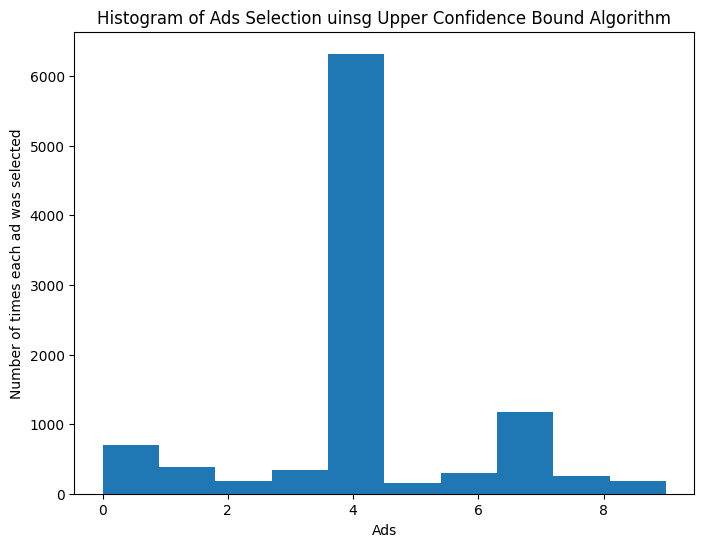

In [10]:
#@title Visualizing the Results
plt.figure(figsize=(8, 6))
plt.hist(ads_selected)
plt.title("Histogram of Ads Selection uinsg Upper Confidence Bound Algorithm")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()